# Part 1

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [8]:
logins['count'] = 1

In [13]:
logins.set_index('login_time', inplace=True)

In [14]:
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [16]:
delta = timedelta(minutes=15)

In [20]:
min15 = logins.resample(delta).sum()

In [21]:
min15

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


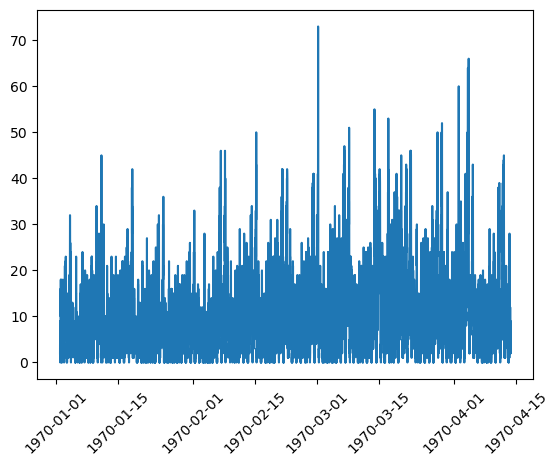

In [24]:
plt.plot(min15)
plt.xticks(rotation=45)
plt.show()

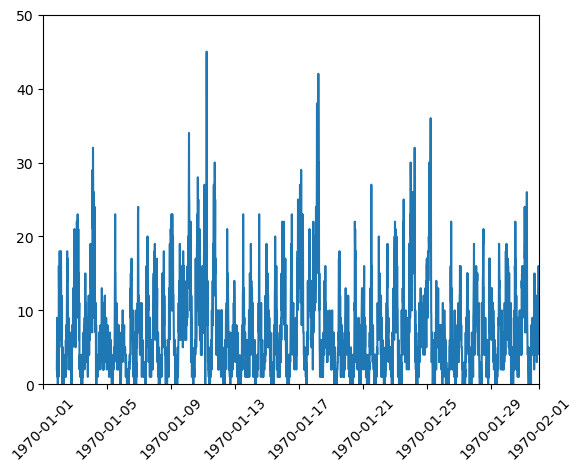

In [29]:
plt.plot(min15)
plt.xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1970-02-01'))
plt.ylim(0, 50)
plt.xticks(rotation=45)
plt.show()

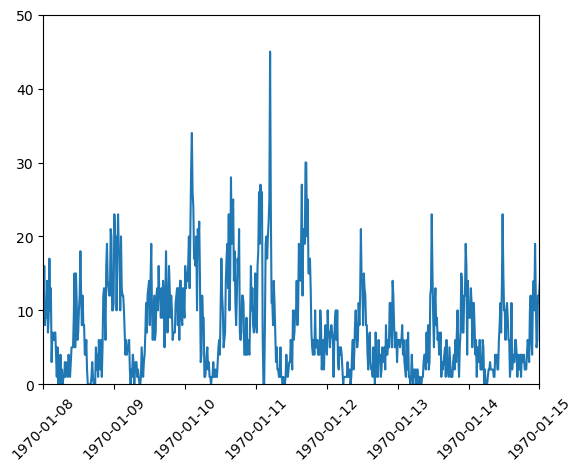

In [37]:
plt.plot(min15)
plt.xlim(pd.Timestamp('1970-01-08'), pd.Timestamp('1970-01-15'))
plt.ylim(0, 50)
plt.xticks(rotation=45)
plt.show()

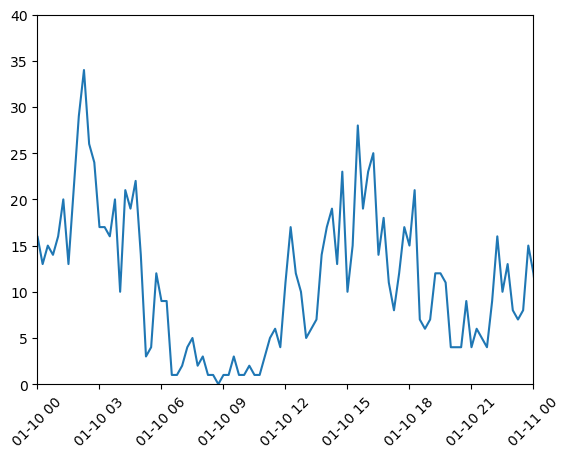

In [35]:
plt.plot(min15)
plt.xlim(pd.Timestamp('1970-01-10'), pd.Timestamp('1970-01-11'))
plt.ylim(0, 40)
plt.xticks(rotation=45)
plt.show()

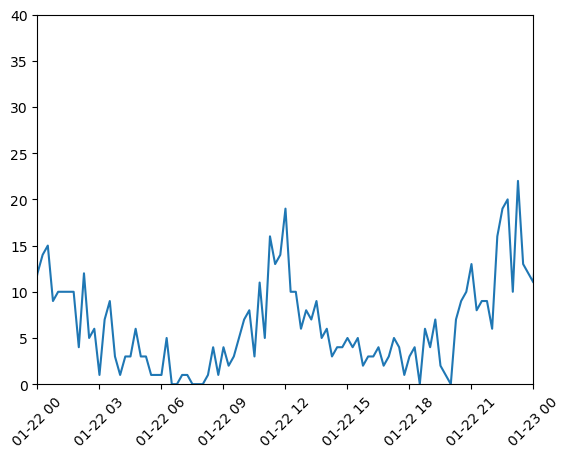

In [36]:
plt.plot(min15)
plt.xlim(pd.Timestamp('1970-01-22'), pd.Timestamp('1970-01-23'))
plt.ylim(0, 40)
plt.xticks(rotation=45)
plt.show()

As shown there appear to be daily peaks in the evening around midnight to 2am and then again during the day around noon to 3pm. That said, the peaks do seem to shift some, so it isn't the same time every night/afternoon. There also appears to be a roughly weekly peak.

# Part 2

### 1)
I would use the number of tolls reimbursed per driver as the key metric for this experiment. By tracking the number of tolls reimbursed you get an exact count for how many times a driver crossed over to the other city and then back. You would have an idea of how many times they crossed before the reimbursement experiment, and then have a count for after to compare and evaluate.

### 2)
a) I would establish accounts for all of the driver partners for a set length of time before the change to track how many trips across the bridge they made. I would then implement the reimbursement change, and monitor for the same length of time after the change. 

b) I would conduct a paired t-test to determine whether the difference between bridge crossings before and after the change has been implemented.

c) If the t-test statistic is large it suggests that the difference between samples outweighs the expected difference if the change had no impact. The p-value then provides the likelihood that the same result would be observed if the null hypothesis that reimbursements had no impact is true. If the p-value is small (below 0.05) we generally accept the results as significant. It's also important to include the degrees of freedom for the test in case the sample size was small and we need more data before acting on the results.

# Part 3

In [38]:
riders = pd.read_json('ultimate_data_challenge.json')

In [39]:
riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [40]:
riders.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [42]:
riders.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [43]:
riders['signup_date'] = pd.to_datetime(riders['signup_date'])

In [45]:
riders['last_trip_date'] = pd.to_datetime(riders['last_trip_date'])

In [46]:
riders.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [47]:
riders['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [50]:
riders['retained'] = np.where(riders['last_trip_date'] > '2014-06-01', True, False)

In [51]:
riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [64]:
dummied = pd.get_dummies(riders, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [74]:
from scipy import stats

In [76]:
for col in dummied.drop(columns=['retained']).columns:
    stat, p_val = stats.pearsonr(dummied[col], dummied['retained'])
    print(col+' has a statistic of {} and a p-value of {}'.format(stat, p_val))

trips_in_first_30_days has a statistic of 0.21472789849785687 and a p-value of 0.0


UFuncTypeError: ufunc 'add' cannot use operands with types dtype('float64') and dtype('<M8[ns]')